# Create time series plots for all relevant parameters

List of parameters:
- MLD depth
- nitrogen dynamics
- silicate dynamics
- PAR / irradiance
- some kind of detritus/turbidity measure
- primary production
- chl a
- phytoplankton abundances
- zooplankton abundances


In [116]:
require(tidyverse, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

## First of all, let's read all data

In [138]:
#MLD
mld_depth <- read.csv("DATA_processed/MLD_depth_calculated.csv")
mld_depth$Date <- as.Date(mld_depth$Date, format="%Y-%m-%d")

# read CTDdat file
ctd <- read.csv("DATA_processed/CTDdat_processed.csv")
ctd$Date <- as.Date(ctd$Date, format="%Y-%m-%d")

#Niskin
niskin <- read.csv("DATA_processed/Niskin_bottle_processed.csv")
niskin$Date <- as.Date(niskin$Date, format="%Y-%m-%d")

#Niskin below MLD
niskinMLD <- read.csv("DATA_processed/Niskin_at_MLD_filtered.csv")
niskinMLD$Date <- as.Date(niskinMLD$Date, format="%Y-%m-%d")

#Niskin above MLD
niskinAboveMLD <- read.csv("DATA_processed/Niskin_above_MLD.csv")
niskinAboveMLD$Date <- as.Date(niskinAboveMLD$Date, format="%Y-%m-%d")

#PAR
SeaWIFs <- read.csv('DATA_processed/SeaWIFs_monthly_extracted.csv')
date = as.character(paste(SeaWIFs$year,'-',SeaWIFs$month,'-15',sep=''))
SeaWIFs$Date <- as.Date(date, format='%Y-%m-%d')

#euphotic depth
SeaWIFs_Zeu_lee <- read.csv('DATA_processed/SeaWIFs_EuphoticDepth_extracted.csv')
date = as.character(paste(SeaWIFs_Zeu_lee$year,'-',SeaWIFs_Zeu_lee$month,'-15',sep=''))
SeaWIFs_Zeu_lee$Date <- as.Date(date, format='%Y-%m-%d')

#PhytoAbundances
phyto_filtered <- read.csv("DATA_processed/PhytoAbund_filtered.csv")
phyto_filtered$date <- as.Date(phyto_filtered$date, format="%Y-%m-%d")

#PhytoAbundances above MLD
phyto_above_MLD <- read.csv("DATA_processed/Phyto_above_MLD.csv")
phyto_above_MLD$date <- as.Date(phyto_above_MLD$Date, format="%Y-%m-%d")

#Zooplankton
zoo <- read.csv("DATA_processed/Master_Zooplankton_Nov2017_Cleaned.csv")
zoo$date <- as.Date(zoo$Date, format="%Y-%m-%d")

# MLD depth

In [38]:
head(mld_depth)

X.1,X,CruiseID,Date,month,days,press,lat,lon,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla,belowmld
1,12,93HG_001,1995-11-08,11,311,24.138,10.5,-64.67,23.982,23.984,26.711,36.663,26.717,NA,NA,NA,TRUE
2,638,93HG_002,1995-12-13,12,346,18.103,10.5,-64.67,24.712,24.684,25.330,36.906,25.334,NA,NA,NA,TRUE
3,1240,93HG_003,1996-01-12,1,11,28.162,10.5,-64.67,25.174,25.175,23.727,36.913,23.733,NA,NA,NA,TRUE
4,1813,93HG_004,1996-02-13,2,43,24.138,10.5,-64.67,25.348,25.350,23.206,36.943,23.211,NA,NA,NA,TRUE
5,2437,93HG_005,1996-03-13,3,72,14.080,10.5,-64.67,25.609,25.610,22.113,36.873,22.116,NA,NA,NA,TRUE
6,3741,93HG_006,1996-04-16,4,106,10.057,10.5,-64.67,25.578,25.579,22.343,36.893,22.345,NA,NA,NA,TRUE


In [39]:
df <- mld_depth %>%
  select(Date, press) %>%
  gather(key='key',value = "value", -Date)
head(df)

Date,key,value
1995-11-08,press,24.138
1995-12-13,press,18.103
1996-01-12,press,28.162
1996-02-13,press,24.138
1996-03-13,press,14.080
1996-04-16,press,10.057


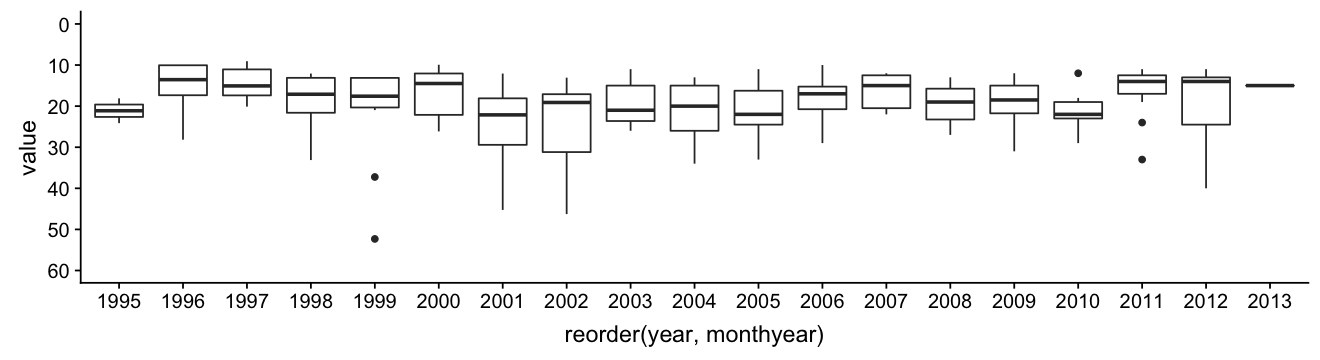

In [40]:
df$monthyear <- as.Date(format(df$Date, format="%Y-%m"),format="%m-%d")
df$year <- as.numeric(format(df$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(df) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))

Warning message:
“Removed 1 rows containing missing values (geom_path).”

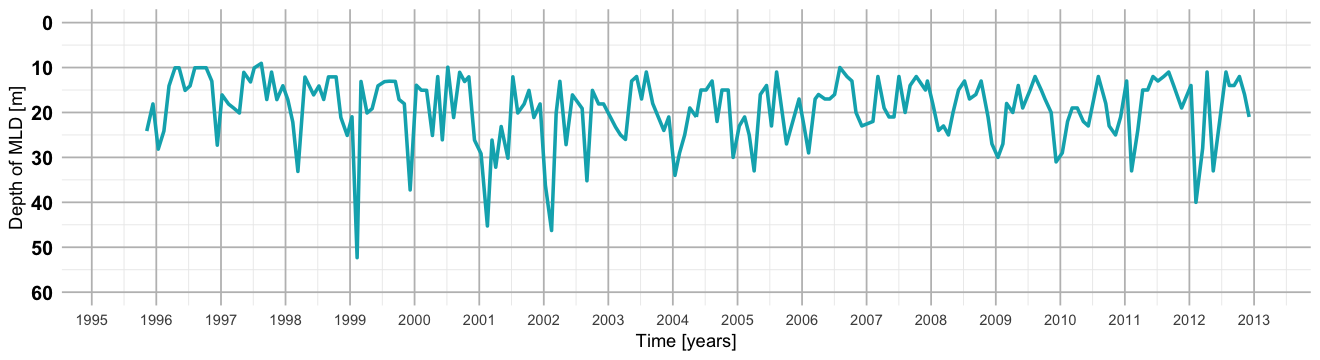

In [41]:
ggplot(df, aes(x = Date, y = value)) + 
  geom_line(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) + theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Depth of MLD [m]') + xlab('Time [years]') + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))
    

In [18]:
ggsave('PLOTS/MLD_entire_ts.png', width=11, height= 3)

Warning message:
“Removed 1 rows containing missing values (geom_path).”

In [23]:
if(!require(changepoint)){
  install.packages('changepoint')
}

Loading required package: changepoint
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


In [24]:
library(changepoint)


Loading required package: changepoint.np
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘changepoint.np’”Warning message:
“package ‘changepoint.np’ is not available (for R version 3.5.1)”


	Shapiro-Wilk normality test

data:  m1
W = 0.89674, p-value = 1.818e-10


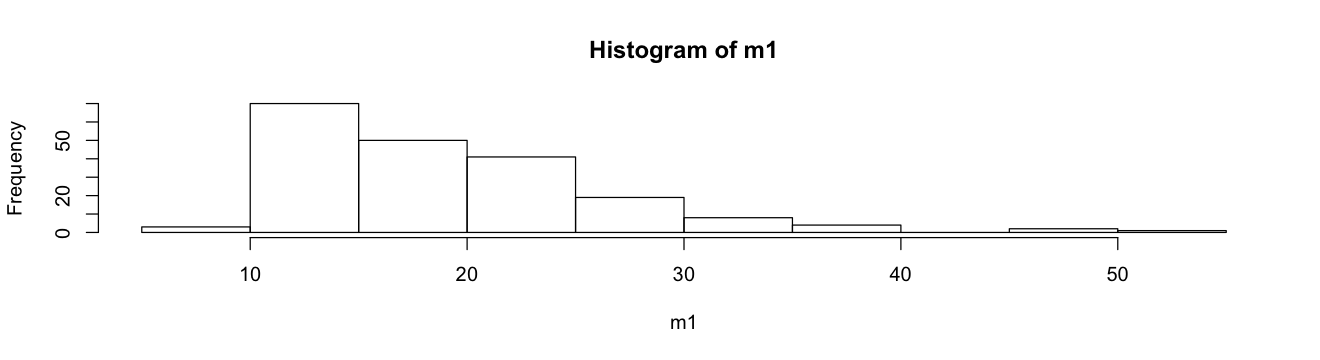

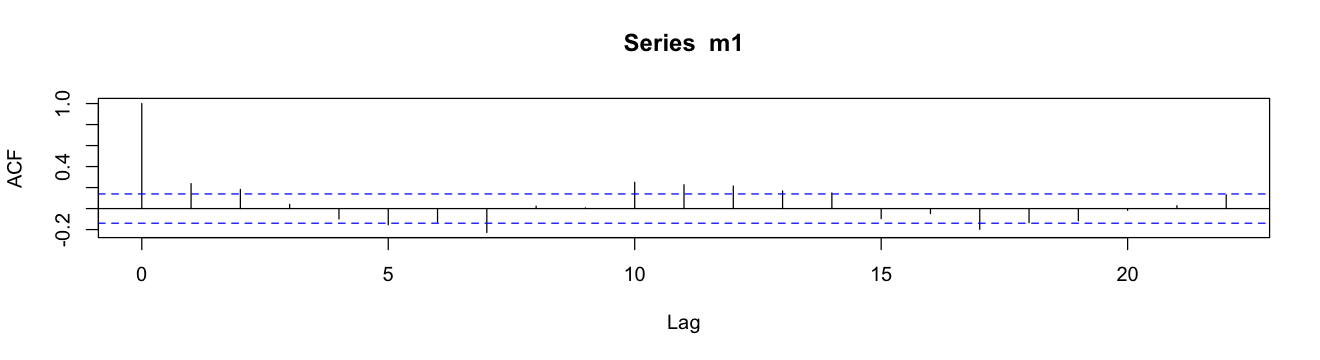

In [44]:
m1=df$value
hist(m1)
shapiro.test(m1)
acf(m1)

In [40]:
set.seed(1)
v1=df$value
v1.man=cpt.var(v1,method='PELT',penalty='Manual',pen.value='2*log(n)')
cpts(v1.man)
param.est(v1.man)

[1] 80

$variance
[1] 78.12804 36.84469

$mean
[1] 19.16816

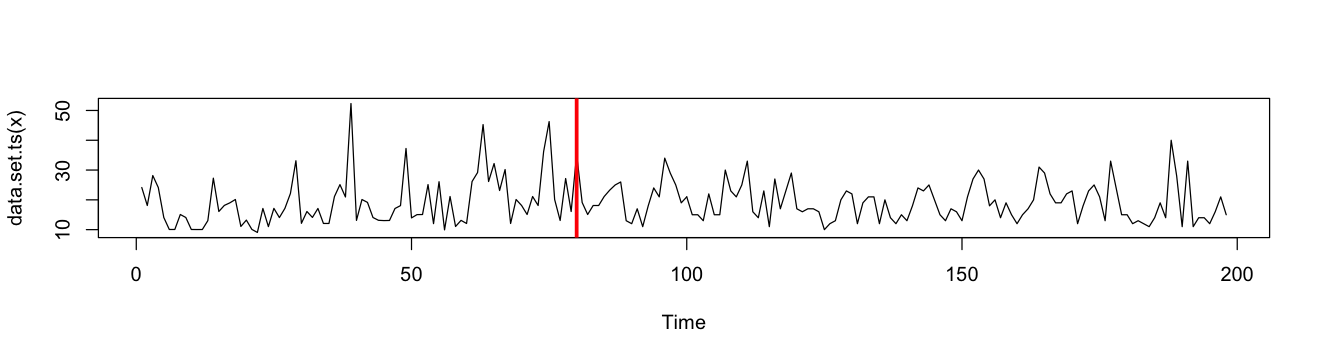

In [41]:
plot(v1.man,cpt.width=3)

# How does this correlate to ENSO index? -> Taylor et al.

just by the variability, it doesn't seem that variable... perhaps depth of euphotic zone is important  
ressource supply index -> emilio publication  
  
combines light and nutrient availablitly   
  
# compare different regimes
use principal components?   
  
Miriam Schluter -> Ago's PhD Student show publications -> regime shift in the north sea!  
check methods for identifying regime shift  
  
just google scholar regime shift.. time series analysis  
glmm for correctiong for autocorrelation, "generalized mixed models for ecology" book with one relevant chapter  
  
# not get too complicated!  
copy regimes from pinckney et al.  
  
# PAR varies...   
so look at light attenuation coeff!!!  euphotic depth take it from sattelites!!   
"light penetration might make the difference between regimes"  
  
calculate euphotic depth!  
calculate RSI!  
  
# look at coefficient of variability  
for each time-step  
then plot it over time and mark 2 regimes  
plot it together with mean...  
to check for regime shift  
  

# Nitrogen dynamics below MLD

In [6]:
names(niskinMLD)

[1] "X"              "Date"           "X.x"            "Cruise_ID"     
 [5] "Leg"            "lon.x"          "lat.x"          "Day"           
 [9] "days.x"         "Month"          "Year"           "Depth_target"  
[13] "Depth_real"     "O2_ml_L"        "O2_ml_L_Q"      "O2_umol_kg"    
[17] "O2_umol_kg_Q"   "SiOH4_Cumana"   "SiOH4_Cumana_Q" "PO4_Cumana"    
[21] "PO4_Cumana_Q"   "NO3_Cumana"     "NO3_Cumana_Q"   "NH4"           
[25] "NH4_Q"          "NO2"            "NO2_Q"          "NO3_NO2"       
[29] "NO3_NO2_Q"      "PO4"            "PO4_Q"          "SiOH4"         
[33] "SiOH4_Q"        "pH"             "pH_Q"           "Alkalinity"    
[37] "Alkalinity_Q"   "TCO2"           "TCO2_Q"         "fCO2"          
[41] "fCO2_Q"         "sal_bot"        "sal_bot_Q"      "sal_bot_corr"  
[45] "sal_bot_corr_Q" "sal_ctd"        "sal_ctd_Q"      "Temp"          
[49] "Temp_Q"         "Sigma_t"        "Sigma_t_Q"      "TPP"           
[53] "TPP_Q"          "PIP"            "PIP_Q"          "POC_ug_L"      
[57] "POC_ug_L_Q"     "PON_ug_L"       "PON_ug_L_Q"     "CtoN_part"     
[61] "CtoN_part_Q"    "POC_ug_kg"      "POC_ug_kg_Q"    "PON_ug_kg"     
[65] "PON_ug_kg_Q"    "DON_USF_uM"     "DON_USF_uM_Q"   "DOP_USF_uM"    
[69] "DOP_USF_uM_Q"   "DOC"            "DOC_Q"          "TOC"           
[73] "TOC_Q"          "PriPro"         "PriPro_Q"       "Chl"           
[77] "Chl_Q"          "Phaeo"          "Phaeo_Q"        "X.1"           
[81] "X.y"            "CruiseID"       "month"          "days.y"        
[85] "press"          "lat.y"          "lon.y"          "sigma_t"       
[89] "sigma_0"        "potemp"         "sal"            "temp"          
[93] "beam_att"       "beam_cp"        "fluor_chla"     "belowmld"      
[97] "depthdiff"

In [42]:
NO2NO3df <- niskinMLD %>%
  select(Date, NO3_NO2) %>%
  gather(key='key',value = "value", -Date)
head(NO2NO3df)

Date,key,value
1995-11-08,NO3_NO2,NA
1995-12-13,NO3_NO2,NA
1996-01-12,NO3_NO2,NA
1996-02-13,NO3_NO2,NA
1996-03-13,NO3_NO2,NA
1996-04-16,NO3_NO2,NA


Warning message:
“Removed 62 rows containing missing values (geom_point).”

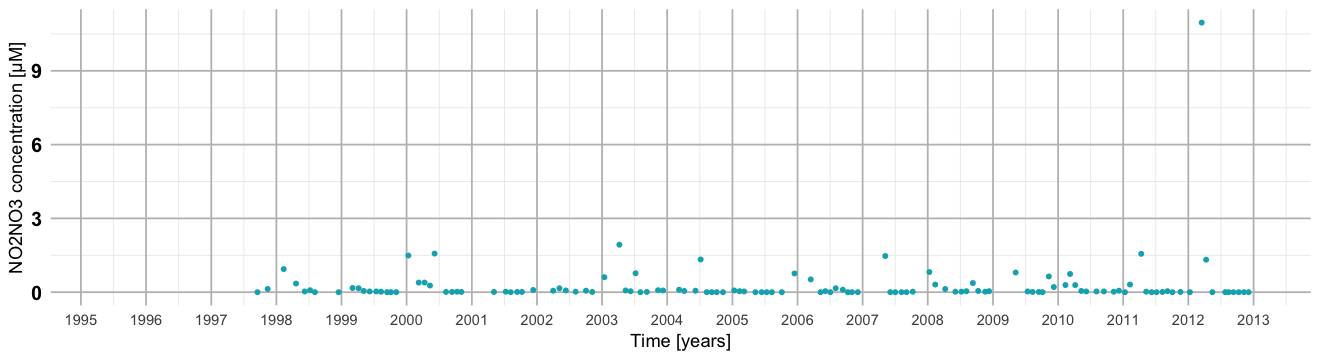

In [47]:
ggplot(NO2NO3df, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('NO2NO3 concentration [µM]') + xlab('Time [years]') + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))+ theme(legend.position = "none")
    

In [48]:
ggsave('PLOTS/no2no3_entire_ts.png', width=11, height= 3)

Warning message:
“Removed 62 rows containing missing values (geom_point).”

# Silicate dynamics below MLD

In [21]:
SiOHdf <- niskinMLD %>%
  select(Date, SiOH4) %>%
  gather(key='key',value = "value", -Date)
head(SiOHdf)

Date,key,value
1995-11-08,SiOH4,NA
1995-12-13,SiOH4,NA
1996-01-12,SiOH4,NA
1996-02-13,SiOH4,NA
1996-03-13,SiOH4,NA
1996-04-16,SiOH4,NA


Warning message:
“Removed 60 rows containing missing values (geom_point).”

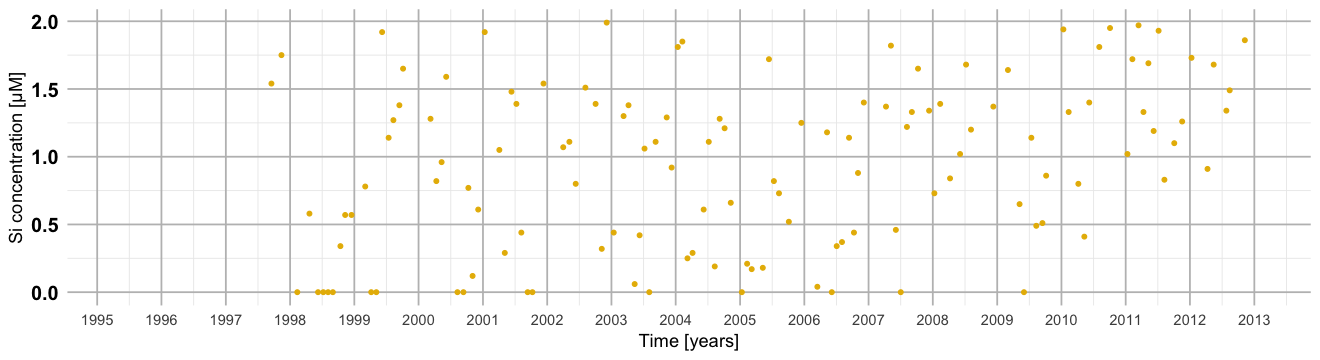

In [49]:
ggplot(SiOHdf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Si concentration [µM]') + xlab('Time [years]') + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12)) + theme(legend.position = "none")
    

In [50]:
ggsave('PLOTS/si_entire_ts.png', width=11, height= 3)

Warning message:
“Removed 60 rows containing missing values (geom_point).”

# PAR irradiance over time

In [56]:
head(SeaWIFs)

year,month,lon,lat,value,unit,var,Date
1997,10,-65.5886,10.54915,50.972,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.5042,10.54915,50.676,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.4198,10.54915,50.412,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.3354,10.54915,51.132,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.2510,10.54915,51.932,einstein m^-2 day^-1,par,1997-10-15
1997,10,-65.1666,10.54915,51.860,einstein m^-2 day^-1,par,1997-10-15


In [59]:
PARdf <- SeaWIFs %>%
    group_by(Date) %>%
    summarise(PARmean = mean(value)) %>%
    select(Date, PARmean) %>%
    gather(key='key',value = "value", -Date)
head(PARdf)

Date,key,value
1997-10-15,PARmean,51.9604
1997-11-15,PARmean,48.6024
1997-12-15,PARmean,46.6760
1998-01-15,PARmean,48.3328
1998-02-15,PARmean,50.7080
1998-03-15,PARmean,54.1156


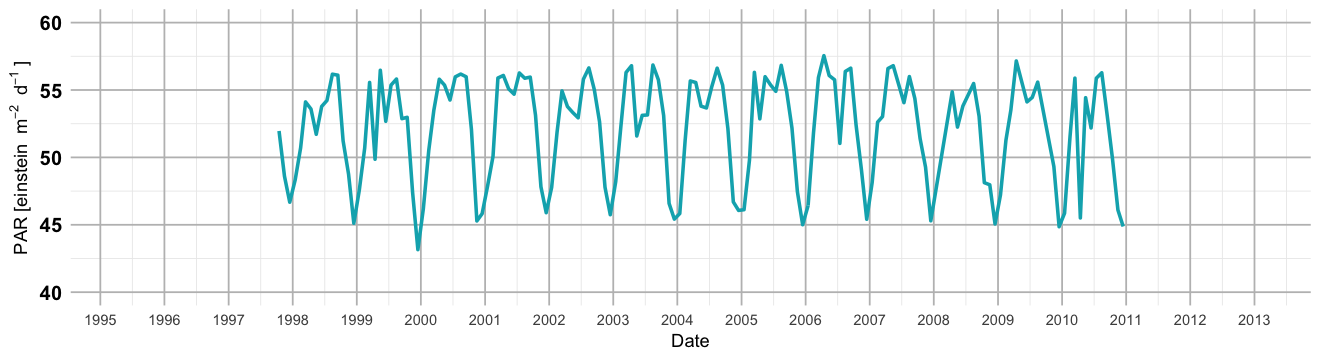

In [81]:
ggplot(PARdf, aes(x = Date, y = value)) + 
  geom_line(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  scale_y_continuous(limits = c(40,60))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('PAR [einstein '~m^-2~ ~d^-1~']')) + theme(legend.position = "none")+ theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12)) + theme(legend.position = "none")

In [82]:
ggsave('PLOTS/PAR_SeaWIFs_monthlyavg_entire_ts.png', width=11, height= 3)

# Euphotic depth over time from SeaWIFs 

In [14]:
head(SeaWIFs_Zeu_lee)

year,month,lon,lat,value,unit,var,Date
1997,10,-65.5886,10.536,77.530,m,Zeu_lee,1997-10-15
1997,10,-65.5042,10.536,82.240,m,Zeu_lee,1997-10-15
1997,10,-65.4198,10.536,84.450,m,Zeu_lee,1997-10-15
1997,10,-65.3354,10.536,87.830,m,Zeu_lee,1997-10-15
1997,10,-65.2510,10.536,88.200,m,Zeu_lee,1997-10-15
1997,10,-65.1666,10.536,85.845,m,Zeu_lee,1997-10-15


In [67]:
Zeu_lee_df <- SeaWIFs_Zeu_lee %>%
    group_by(Date) %>%
    summarise(EZmean = mean(value)) %>%
  select(Date, EZmean) %>%
  gather(key='key',value = "value", -Date)
head(Zeu_lee_df)

Date,key,value
1997-10-15,EZmean,82.32150
1997-11-15,EZmean,63.78275
1997-12-15,EZmean,63.15175
1998-01-15,EZmean,58.08825
1998-02-15,EZmean,63.32025
1998-03-15,EZmean,45.37625


Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”

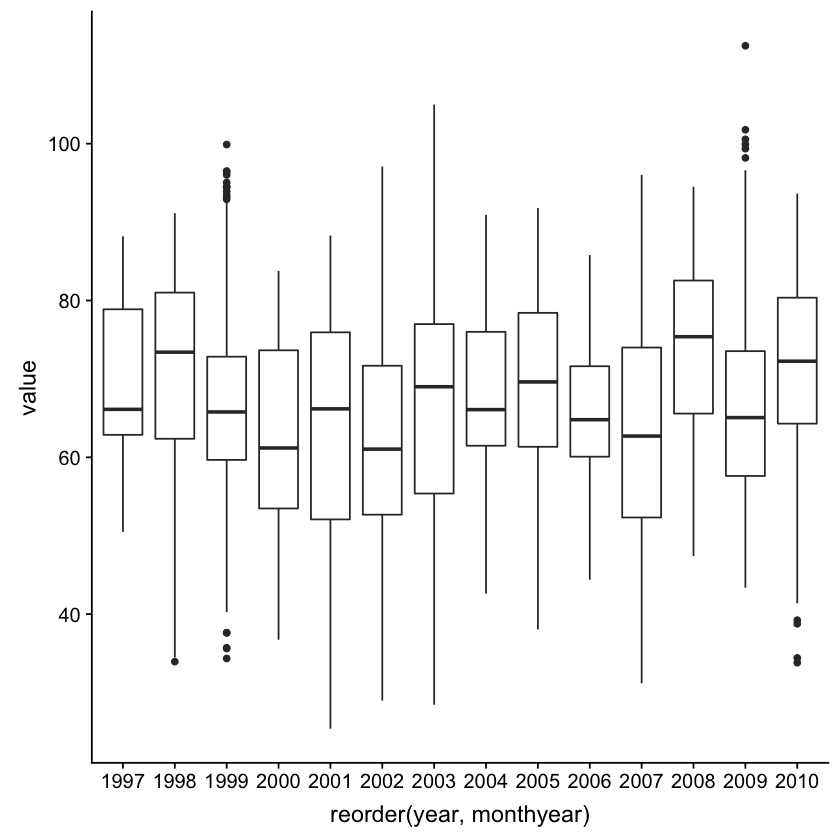

In [9]:
Zeu_lee_df$monthyear <- as.Date(format(Zeu_lee_df$Date, format="%Y-%m"),format="%m-%d")
Zeu_lee_df$year <- as.numeric(format(Zeu_lee_df$Date, format="%Y"))

# plot boxplot of distribution over the year per group
ggplot(Zeu_lee_df) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))

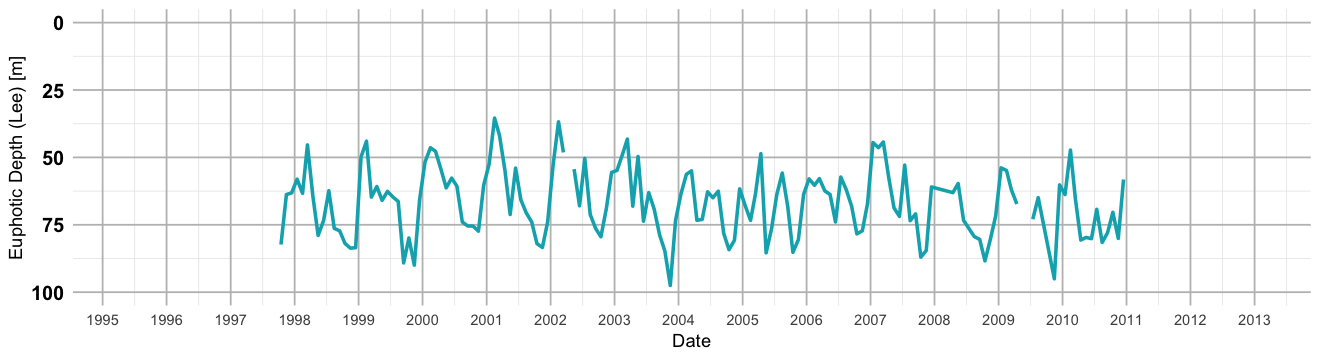

In [78]:
ggplot(Zeu_lee_df, aes(x = Date, y = value)) + 
  geom_line(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
 scale_y_continuous(trans = "reverse", limits = c(100,0))+
    ylab('Euphotic Depth (Lee) [m]') + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12)) + theme(legend.position = "none")

In [79]:
ggsave('PLOTS/EDZlee_SeaWIFs_monthlyavg_entire_ts.png', width=11, height= 3)

# Beam attenuation

In [44]:
head(ctd)

X,CruiseID,Date,month,days,press,lat,lon,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla
1,93HG_001,1995-11-08,11,311,2.011,10.5,-64.67,23.764,23.764,27.522,36.612,27.522,NA,NA,NA
2,93HG_001,1995-11-08,11,311,4.023,10.5,-64.67,23.775,23.775,27.488,36.612,27.489,NA,NA,NA
3,93HG_001,1995-11-08,11,311,6.034,10.5,-64.67,23.782,23.782,27.464,36.614,27.465,NA,NA,NA
4,93HG_001,1995-11-08,11,311,8.046,10.5,-64.67,23.786,23.787,27.456,36.613,27.458,NA,NA,NA
5,93HG_001,1995-11-08,11,311,10.057,10.5,-64.67,23.787,23.787,27.452,36.613,27.454,NA,NA,NA
6,93HG_001,1995-11-08,11,311,12.069,10.5,-64.67,23.787,23.788,27.449,36.612,27.452,NA,NA,NA


In [4]:
beamer <-  ctd %>%
  filter(press > 100) %>%
  select(Date, beam_cp, beam_att) %>%
  gather(key='key',value = "value", -Date)
head(beamer)

Date,key,value
1995-11-08,beam_cp,NA
1995-11-08,beam_cp,NA
1995-11-08,beam_cp,NA
1995-11-08,beam_cp,NA
1995-11-08,beam_cp,NA
1995-11-08,beam_cp,NA


In [6]:
beam <- ggplot(beamer, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+ #scale_y_log10() +
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('attenuation coefficient [1/meter]') #+ theme(legend.position = "none")
    

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 11 rows containing missing values (geom_point).”Warning message:
“Removed 173532 rows containing missing values (geom_point).”Warning message:
“Removed 32 rows containing missing values (geom_point).”

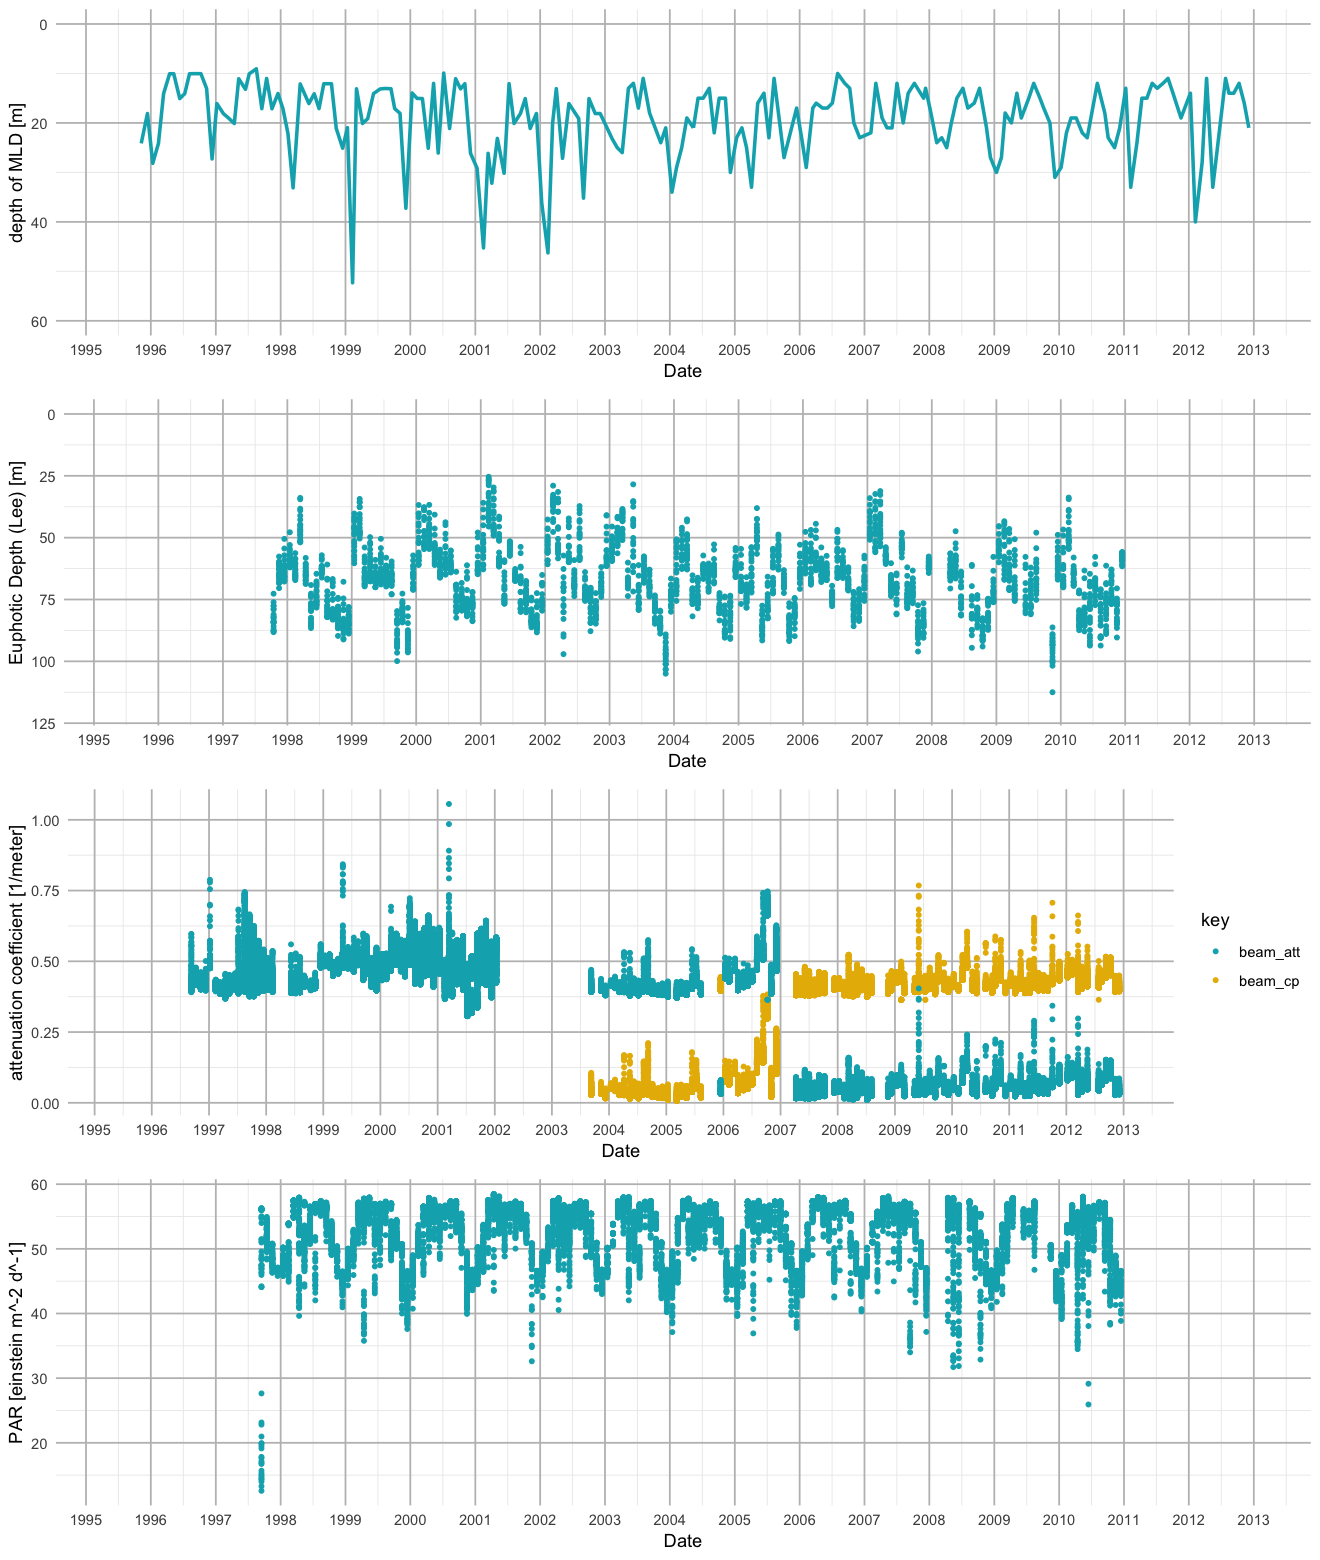

In [56]:
library('gridExtra')
options(repr.plot.width=11, repr.plot.height=13)
Plot1 <- grid.arrange(MLD,Zeu_lee,beam,PAR, ncol = 1)
ggsave('PlotMLDbeamParZeulee.png', plot = Plot1, width = 11,height = 13)
options(repr.plot.width=11, repr.plot.height=3)

# Primary Production above MLD

In [14]:
head(niskinAboveMLD)

X,Date,X.x,Cruise_ID,Leg,lon.x,lat.x,Day,days.x,Month,⋯,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla,belowmld,depthdiff
1,1999-02-10,756,93HG_039,1,-64.67,10.5,10,40,2,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,50.732
2,1999-02-10,757,93HG_039,1,-64.67,10.5,10,40,2,⋯,25.714,25.716,21.635,36.834,21.645,0.577,NA,0.325,TRUE,45.600
3,2002-02-14,1442,93HG_075,1,-64.67,10.5,14,44,2,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,44.522
4,2001-02-16,1213,93HG_063,1,-64.67,10.5,16,46,2,⋯,25.834,25.836,21.069,36.785,21.078,0.575,NA,1.595,TRUE,43.480
5,2012-02-07,3562,93HG_188,1,-64.67,10.5,7,37,2,⋯,25.652,25.654,21.724,36.787,21.732,0.109,0.473,0.240,TRUE,38.830
6,2002-02-14,1443,93HG_075,1,-64.67,10.5,14,44,2,⋯,25.578,25.581,22.177,36.859,22.186,NA,NA,NA,TRUE,38.641


In [107]:
PPabovedf <- niskinAboveMLD %>%
  select(Date, PriPro) %>%
  gather(key='key',value = "value", -Date)
head(PPabovedf)

Date,key,value
1999-02-10,PriPro,NA
1999-02-10,PriPro,NA
2002-02-14,PriPro,NA
2001-02-16,PriPro,15.07
2012-02-07,PriPro,NA
2002-02-14,PriPro,NA


Warning message:
“Removed 264 rows containing missing values (geom_point).”

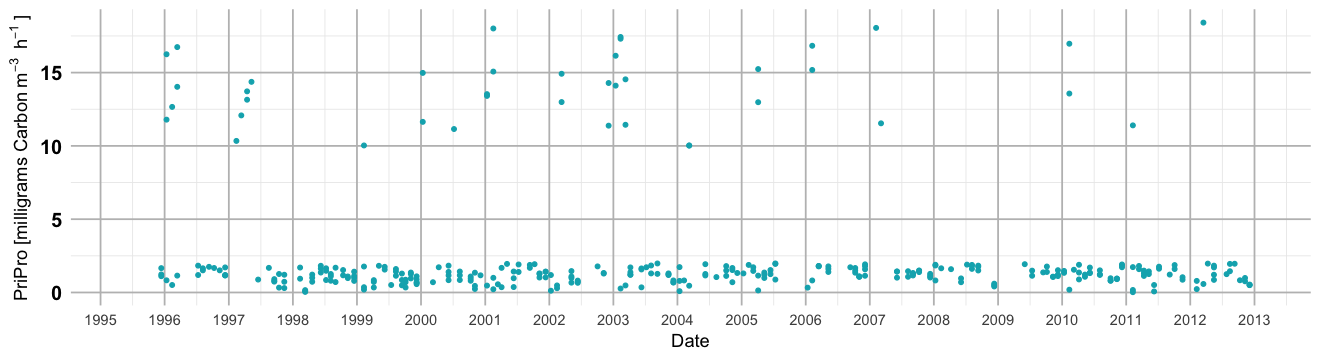

In [108]:
ggplot(PPabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(limits = c(0,60))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('PriPro [milligrams Carbon'~m^-3~ ~h^-1~']')) + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [92]:
ggsave('PLOTS/PriPro_aboveMLD_entire_ts.png', width=11, height= 3)

Warning message:
“Removed 264 rows containing missing values (geom_point).”

# Chlorophyll A above MLD

In [114]:
head(niskinAboveMLD$Chl*niskinAboveMLD$)

[1] 200.8973 151.1961 124.9236 173.8061  24.0000 120.7595

In [125]:
ChlAabovedf <- niskinAboveMLD %>%
    group_by(Date) %>%
    summarise(ChlAsum = mean(Chl)) %>%
  select(Date, ChlAsum) %>%
  gather(key='key',value = "value", -Date)
head(ChlAabovedf)

Date,key,value
1995-11-08,ChlAsum,0.095000
1995-12-13,ChlAsum,0.150000
1996-01-12,ChlAsum,1.460000
1996-02-13,ChlAsum,0.877500
1996-03-13,ChlAsum,2.913333
1996-04-16,ChlAsum,3.405000


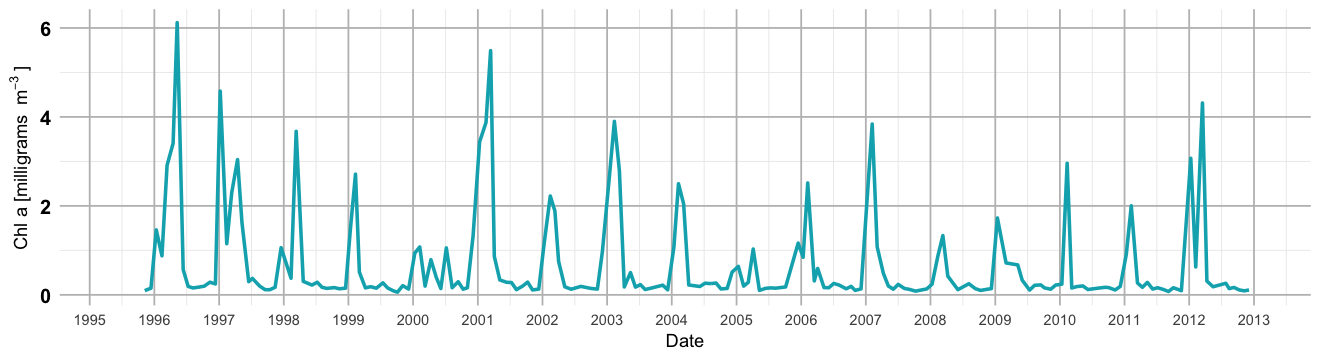

In [126]:
ggplot(ChlAabovedf, aes(x = Date, y = value)) + 
  geom_line(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('Chl a [milligrams '~m^-3~']')) + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [111]:
ggsave('PLOTS/ChlA_MEANaboveMLD_entire_ts.png', width=11, height= 3)

# Phytoplankton Abundances above MLD

In [19]:
names(phyto_above_MLD)

[1] "X"          "Date"       "X.1.x"      "X.x"        "CruiseID.x"
 [6] "lon.x"      "lat.x"      "date"       "month.x"    "year"      
[11] "depth"      "taxon"      "group"      "abundance"  "X.1.y"     
[16] "X.y"        "CruiseID.y" "month.y"    "days"       "press"     
[21] "lat.y"      "lon.y"      "sigma_t"    "sigma_0"    "potemp"    
[26] "sal"        "temp"       "beam_att"   "beam_cp"    "fluor_chla"
[31] "belowmld"   "depthdiff"

In [128]:
PhyTotAbundabovedf <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(Date) %>%
  summarize(TotAbund = sum(abundance)) %>%
  select(Date, TotAbund) %>%
  gather(key='key',value = "value", -Date)
PhyTotAbundabovedf$Date <- as.Date(PhyTotAbundabovedf$Date)
str(PhyTotAbundabovedf)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170 obs. of  3 variables:
 $ Date : Date, format: "1995-11-08" "1995-12-13" ...
 $ key  : chr  "TotAbund" "TotAbund" "TotAbund" "TotAbund" ...
 $ value: num  790 3678 5366 5191 5757 ...


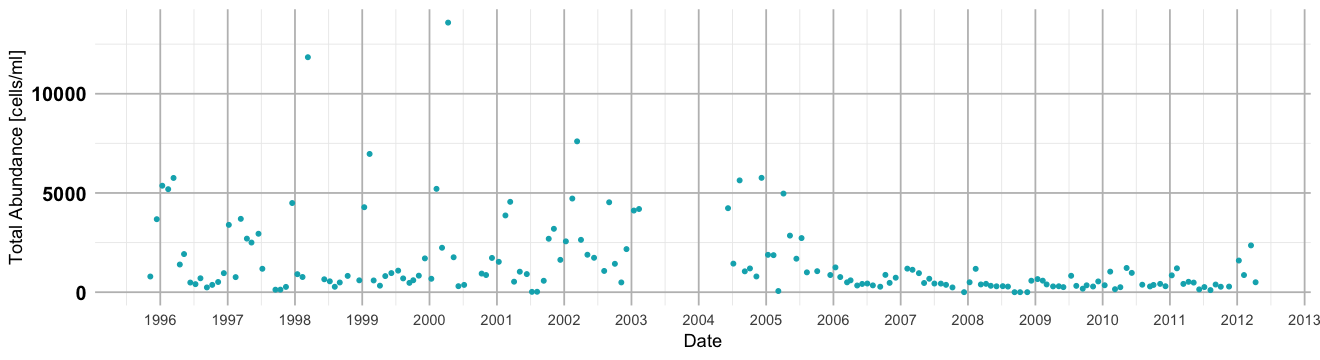

In [133]:
ggplot(PhyTotAbundabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y')+
    ylab('Total Abundance [cells/ml]') + theme(legend.position = "none") + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [134]:
ggsave('PLOTS/Phyto_Tot_Abund_aboveMLD.png', width=11, height= 3)

In [131]:
PhyTotAbunddf <- phyto_filtered[!phyto_filtered$group == 'TOTAL',] %>%
  group_by(date) %>%
  summarize(TotAbund = sum(abundance)) %>%
  select(date, TotAbund) %>%
  gather(key='key',value = "value", -date)
PhyTotAbunddf$Date <- as.Date(PhyTotAbunddf$date)
str(PhyTotAbunddf)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170 obs. of  4 variables:
 $ date : Date, format: "1995-11-08" "1995-12-13" ...
 $ key  : chr  "TotAbund" "TotAbund" "TotAbund" "TotAbund" ...
 $ value: num  2119 5964 10810 9100 6941 ...
 $ Date : Date, format: "1995-11-08" "1995-12-13" ...


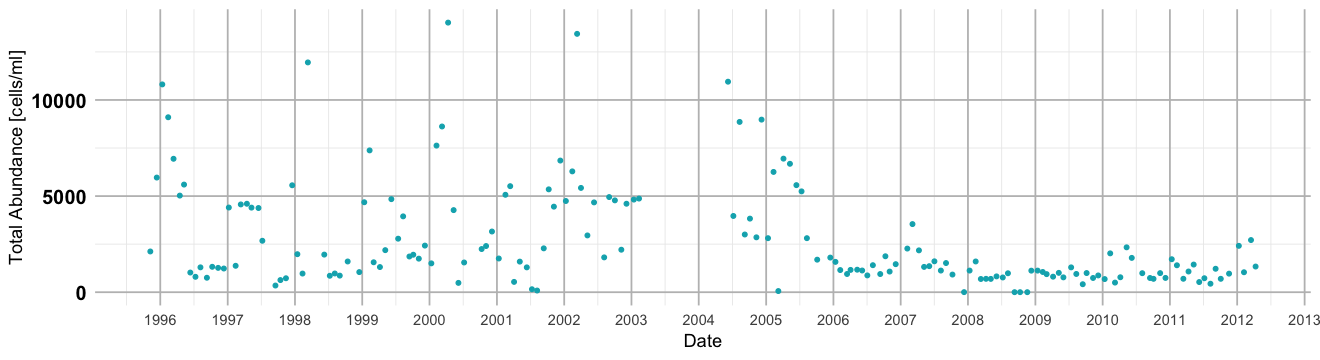

In [135]:
ggplot(PhyTotAbunddf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y')+
    ylab('Total Abundance [cells/ml]') + theme(legend.position = "none")  + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [136]:
ggsave('PLOTS/Phyto_Tot_Abund_allDEPTH.png', width=11, height= 3)

In [140]:
PhyGroupAbundabovedf <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(Date,group) %>%
  summarize(GroupAbund = sum(abundance)) %>%
  select(Date, group, GroupAbund) %>%
  gather(key='key',value = "value", -Date,-group)
PhyGroupAbundabovedf$Date <- as.Date(PhyGroupAbundabovedf$Date)
head(PhyGroupAbundabovedf)

Date,group,key,value
1995-11-08,COCCOLITHOPHORIDS,GroupAbund,1.000
1995-11-08,CYANOBACTERIA,GroupAbund,2.500
1995-11-08,DIATOMS,GroupAbund,228.125
1995-11-08,DINOFLAGELLATES,GroupAbund,45.000
1995-11-08,NANOFLAGELLATES,GroupAbund,513.218
1995-11-08,OTHERS,GroupAbund,0.000


Warning message:
“Transformation introduced infinite values in continuous y-axis”

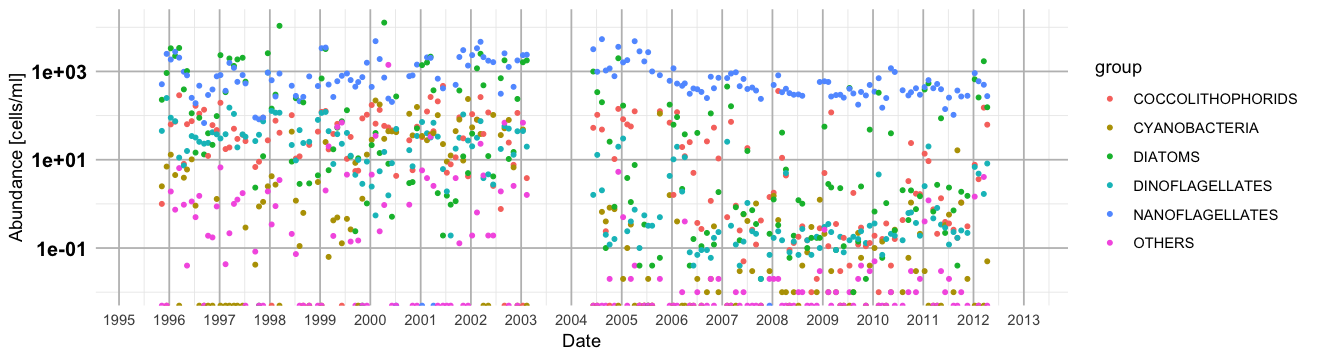

In [142]:
ggplot(PhyGroupAbundabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = group), size = 1) + 
  #scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+ scale_y_log10()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Abundance [cells/ml]') + theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [143]:
ggsave('PLOTS/Phyto_PerGROUP_Abund_aboveMLD.png', width=11, height= 3)

Warning message:
“Transformation introduced infinite values in continuous y-axis”

 # TOTAL ABUNDANCE PER GROUP FOR RANKING

In [145]:
PhyGrouptotabund <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(group) %>%
  summarize(GroupAbund = sum(abundance)) %>%
  select(group, GroupAbund) %>%
  gather(key='key',value = "value",-group)
#PhyGroupAbundabovedf$Date <- as.Date(PhyGroupAbundabovedf$Date)
head(PhyGrouptotabund)

group,key,value
COCCOLITHOPHORIDS,GroupAbund,7250.349
CYANOBACTERIA,GroupAbund,2348.154
DIATOMS,GroupAbund,80008.609
DINOFLAGELLATES,GroupAbund,4375.259
NANOFLAGELLATES,GroupAbund,154883.941
OTHERS,GroupAbund,1870.889


In [183]:
head(PhyGroupAbundabovedf$group)

[1] COCCOLITHOPHORIDS CYANOBACTERIA     DIATOMS           DINOFLAGELLATES  
[5] NANOFLAGELLATES   OTHERS           
7 Levels: COCCOLITHOPHORIDS CYANOBACTERIA DIATOMS ... TOTAL

Warning message:
“Transformation introduced infinite values in continuous y-axis”

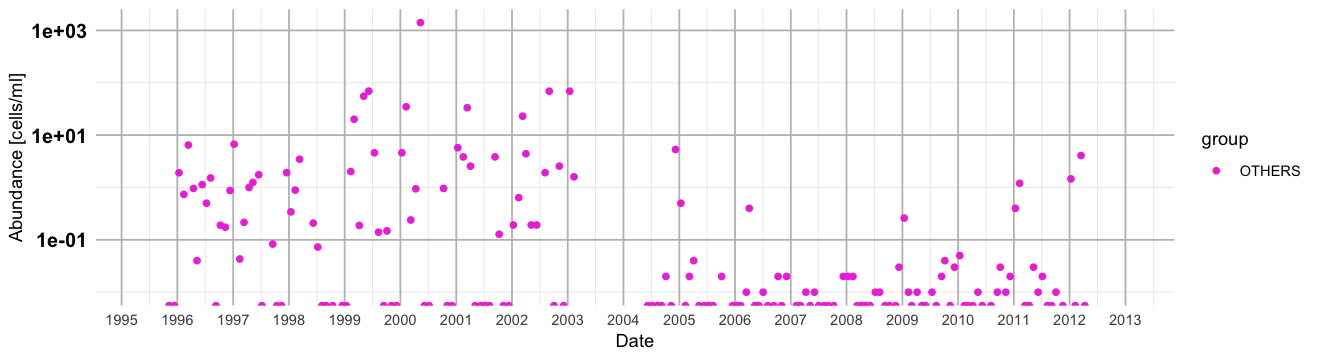

In [198]:
options(repr.plot.width=11, repr.plot.height=3)
facets <- c("COCCOLITHOPHORIDS", "CYANOBACTERIA", "DIATOMS", "DINOFLAGELLATES", "NANOFLAGELLATES","OTHERS")
colors <- c('#f35e5a','#a89005','#17b12b','#17b3b7','#5086ff','#ef43dc')
names(colors) <- facets

# plot each group inidividually
ggplot(PhyGroupAbundabovedf[PhyGroupAbundabovedf$group == facets[6],], aes(x = Date, y = value, col=group)) + 
  geom_point() + 
  scale_color_manual(values = colors) +
  theme_minimal()+ scale_y_log10()+
  theme(panel.grid.major = element_line(colour = 'grey')) + 
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Abundance [cells/ml]') + theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [199]:
ggsave('PLOTS/Phyto_indGroup_OTHERS.png', width=11, height= 3)

Warning message:
“Transformation introduced infinite values in continuous y-axis”

# Zooplankton Abundances

In [55]:
head(zoo)

X,CRUISE,Date,YEAR,MONTH,Analyst,Mesh.Size,TOTAL.DENSITY,BIOMASS,ASH,⋯,APPENDICULARIANS,SALPS,DOLIOLIDS,BIVALVES,H.CRUSTACEA,L.ANFIOXUS,LUCIFER,JUV..GASTROPOD,yday,date
1,71,2001-10-09,2001,10,Javier Gutierrez,500,213,15.9,3.3,⋯,9.36,1.83,NA,NA,NA,,NA,,281,2001-10-09
20,72,2001-11-06,2001,11,Javier Gutierrez,500,13,2.3,0.1,⋯,0.52,0.52,NA,NA,NA,,NA,,309,2001-11-06
39,73,2001-12-11,2001,12,Javier Gutierrez,500,9,0.7,0.2,⋯,0.22,0.03,NA,0.03,0.26,,NA,,344,2001-12-11
58,74,2002-01-10,2002,1,Javier Gutierrez,500,105,4.9,0.18,⋯,0.10,18.00,NA,0.00,0.30,,0.4,,9,2002-01-10
59,74,2002-01-10,2002,1,Javier Gutierrez,200,499,10.2,0.5,⋯,3.20,37.30,NA,1.60,1.60,n.d.,NA,n.d.,9,2002-01-10
96,75,2002-02-14,2002,2,Javier Gutierrez,200,612,12.9,2.6,⋯,5.00,1.70,NA,NA,3.30,n.d.,NA,n.d.,44,2002-02-14


In [200]:
ZOOdf <- zoo %>%
  select(date, BIOMASS, Mesh.Size) %>%
  gather(key='key',value = "value", -date, -Mesh.Size)
head(ZOOdf)

date,Mesh.Size,key,value
2001-10-09,500,BIOMASS,15.9
2001-11-06,500,BIOMASS,2.3
2001-12-11,500,BIOMASS,0.7
2002-01-10,500,BIOMASS,4.9
2002-01-10,200,BIOMASS,10.2
2002-02-14,200,BIOMASS,12.9


Warning message:
“Removed 67 rows containing missing values (geom_point).”

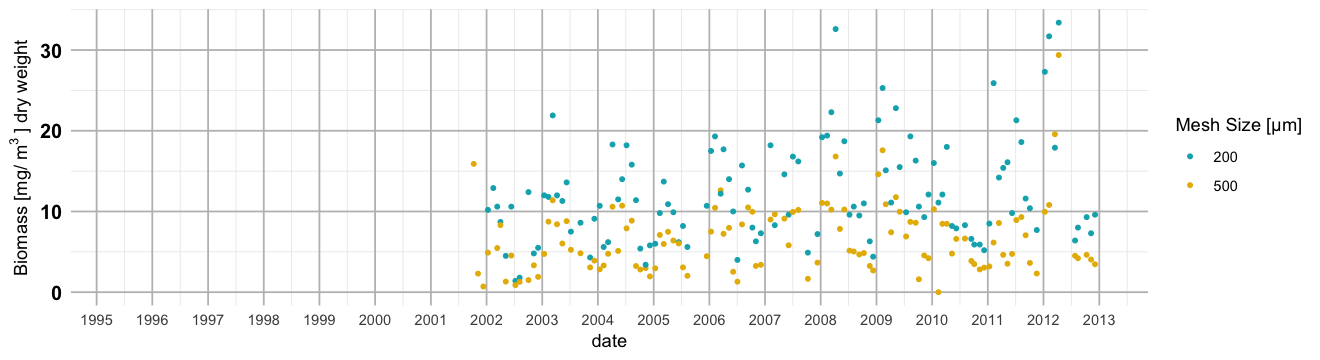

In [208]:
ggplot(ZOOdf, aes(x = date, y = value)) + 
  geom_point(aes(color = as.factor(Mesh.Size)), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('Biomass [mg/'~m^3~'] dry weight'))+ labs(color = "Mesh Size [µm]") + 
    theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))#+ theme(legend.position = "none")

In [209]:
ggsave('PLOTS/ZOOplankton_all_timeseries.png', width=11, height= 3)

Warning message:
“Removed 67 rows containing missing values (geom_point).”

# look at regression here, possibily interpolate to regime 1
fit a regression through the data, and see how it changes  
look at the seasonal component, and look at multi-decadal variability  
also with the regimes  
between regimes variability should be higher  
and the within regimes variability should be lower... for example  